In [ ]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1J7tUY218wTJ6RtOUeSxvh-5ZBRPiKd-S
!unzip /content/tweet_emotions.csv.zip
!rm -rf /content/tweet_emotions.csv.zip
!gdown https://drive.google.com/uc?id=1z_BVURk7ShW9G7DTzUMhy1x3vSzPkkxp
!mkdir sample
!mv /content/predict_score.py /content/sample/.

rm: cannot remove '/content/drive/MyDrive': Operation canceled
rm: cannot remove '/content/drive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove '/content/drive/.file-revisions-by-id': Operation canceled
rm: cannot remove '/content/drive/.Trash-0': Directory not empty
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1J7tUY218wTJ6RtOUeSxvh-5ZBRPiKd-S
To: /content/tweet_emotions.csv.zip
100% 1.63M/1.63M [00:00<00:00, 125MB/s]
Archive:  /content/tweet_emotions.csv.zip
  inflating: tweet_emotions.csv      
Downloading...
From: https://drive.google.com/uc?id=1z_BVURk7ShW9G7DTzUMhy1x3vSzPkkxp
To: /content/predict_score.py
100% 574/574 [00:00<00:00, 945kB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df.shape

(40000, 3)

In [ ]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
col = ['happiness','sadness','surprise','anger','worry','hate']
df = df[df.sentiment.isin(col)]
df['sentiment'].value_counts()

worry        8459
happiness    5209
sadness      5165
surprise     2187
hate         1323
anger         110
Name: sentiment, dtype: int64

In [ ]:
df['sentiment'].unique()

array(['sadness', 'worry', 'surprise', 'hate', 'happiness', 'anger'],
      dtype=object)

In [ ]:
d = {'sadness':'sad','worry':'Fear','hate':'disgust','anger':'anger','happiness':'happy','surprise':'surprise'}
df['sentiment'] = df['sentiment'].apply(lambda x:d[x])
df['sentiment'].value_counts()

Fear        8459
happy       5209
sad         5165
surprise    2187
disgust     1323
anger        110
Name: sentiment, dtype: int64

In [ ]:
df.shape

(22453, 3)

In [ ]:
df.head()

,tweet_id,sentiment,content
1,1956967666,sad,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sad,Funeral ceremony...gloomy friday...
5,1956968477,Fear,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sad,"I should be sleep, but im not! thinking about ..."
7,1956968636,Fear,Hmmm. http://www.djhero.com/ is down


In [ ]:
!pip install emoji
!pip install contractions
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=549163c88fab03eb15f725e39e1b8ea609cee996b26c3b88f4aafff8eb8499e3
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 14.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emoji
import contractions
import string
import spacy
import re
from textblob import TextBlob

def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

def spell_correct(tweet):
    sentence = TextBlob(tweet)
    return sentence.correct()

In [ ]:
nlp = spacy.load('en_core_web_sm')

def process(sent):
    d = nlp(sent)
    tokens=[]
    
    for i in d:
        if i.lemma_ != '-PRON-':
            tokens.append(i.lemma_)
    tokens = [tok for tok in tokens if tok not in string.punctuation]

    tokens = ' '.join(tokens)
    return tokens

In [ ]:
def preprocess_text(sent):
    tweet = replace_retweet(sent, default_replace="")
    tweet = replace_user(tweet, default_replace="twitteruser")
    tweet = demojize(tweet)
    tweet = replace_url(tweet, default_replace="")
    tweet = replace_hashtag(tweet, default_replace="")
    tweet = to_lowercase(tweet)
    tweet = word_repetition(tweet)
    tweet = punct_repetition(tweet, default_replace="")
    tweet = fix_contractions(tweet)
    tweet = process(tweet)
    tweet = re.sub(' +',' ',tweet)
    tweet = str(spell_correct(tweet))
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    tweet = tweet.translate(translator)

    return str(tweet)

In [ ]:
text = df['content'].values[0]
text

'Layin n bed with a headache  ughhhh...waitin on your call...'

In [ ]:
text = preprocess_text(text)
text

'laying n bed with a headache ugh waiting on your call'

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
df['content'] = df['content'].progress_apply(lambda x: preprocess_text(x))

In [ ]:
df.head()

NameError: ignored

In [ ]:
X = df[['content']]
y = df[['sentiment']]

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, stratify=y,test_size=0.25, random_state=101)

NameError: ignored

In [ ]:
X_train.shape,y_train.shape

((16839, 1), (16839, 1))

In [ ]:
X_test.shape,y_test.shape

((5614, 1), (5614, 1))

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

NameError: ignored

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
word_tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=""
)

word_tokenizer.fit_on_texts(X_train['content'].values)

train_text = word_tokenizer.texts_to_sequences(X_train['content'].values)
test_text = word_tokenizer.texts_to_sequences(X_test['content'].values)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_label = encoder.fit_transform(y_train['sentiment'].values)
test_label = encoder.transform(y_test['sentiment'].values)
encoder.classes_

array(['Fear', 'anger', 'disgust', 'happy', 'sad', 'surprise'],
      dtype=object)

In [ ]:
print(X_train['content'].values[0])
print(y_train['sentiment'].values[0])

ah so nice to be back on bike commune although three day off and my what goose sez be call my quadriceps literally scream ah
happy


In [ ]:
print(train_text[0])
print(train_label[0])

[161, 21, 139, 5, 3, 61, 22, 901, 2182, 749, 737, 24, 76, 12, 11, 49, 676, 5401, 3, 154, 11, 5402, 1130, 848, 161]
3


Longest sentence length =  37


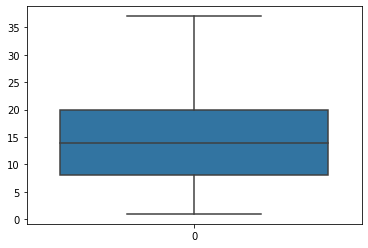

In [ ]:
lengths = [len(seq) for seq in train_text]
print('Longest sentence length = ',max(lengths))

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(lengths)
plt.show()

In [ ]:
max_len = 37

X_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_text, maxlen = max_len, padding = 'pre',
    truncating='post', value=0.0
)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_text, maxlen = X_train.shape[1], dtype = 'int32', padding='pre',
    truncating='post', value=0.0
)

y_train = train_label
y_test = test_label

In [ ]:
X_train.shape,X_test.shape

((16839, 37), (5614, 37))

In [ ]:
y_train.shape,y_test.shape

((16839,), (5614,))

In [ ]:
import numpy as np
output_vec = 100
vocab_size = len(word_tokenizer.word_index) + 1
num_classes = max(np.unique(y_train)) + 1

In [ ]:
num_classes

6

In [ ]:
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = output_vec, input_length = max_len, trainable = True)) 
lstm_model.add(tf.keras.layers.LSTM(units = 64, activation="tanh", return_sequences=False, return_state=False)) #dropout=0.2
lstm_model.add(tf.keras.layers.Dense(num_classes, activation = tf.nn.softmax, name='output_layer'))

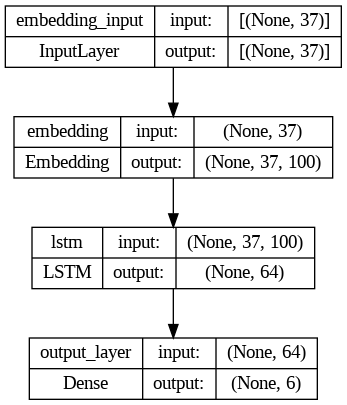

In [ ]:
tf.keras.utils.plot_model(lstm_model, 'model.png', show_shapes=True)

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 100)           993100    
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 output_layer (Dense)        (None, 6)                 390       
                                                                 
Total params: 1,035,730
Trainable params: 1,035,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import numpy as np
from sample import predict_score
import warnings
warnings.filterwarnings("ignore")

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel().astype('int32')
  y_pred = y_pred.ravel().astype('int32')
  return balanced_accuracy_score(y_true,y_pred)

In [ ]:
lstm_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.sparse_categorical_crossentropy, #binary_crossentropy
              metrics = predict_score.accuracy, run_eagerly=True )

In [ ]:
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
validation_batch_size = 32
validation_steps = len(X_test) // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
import time
print('Results for LSTM Classifier:-\n')
start_time = time.time()

result1 = lstm_model.fit(X_train, y_train, 
                   validation_data = (X_test, y_test), 
                   callbacks=[callback],
                   epochs = 5,
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for LSTM Classifier:-

Epoch 1/5


525/526 [============================>.] - ETA: 0s - loss: 1.3763 - accuracy: 0.6213

526/526 [==============================] - 46s 76ms/step - loss: 1.3761 - accuracy: 0.6218 - val_loss: 1.3157 - val_accuracy: 0.9252
Epoch 2/5
525/526 [============================>.] - ETA: 0s - loss: 1.1612 - accuracy: 0.9238

526/526 [==============================] - 28s 52ms/step - loss: 1.1609 - accuracy: 0.9238 - val_loss: 1.2881 - val_accuracy: 0.9271
Epoch 3/5
525/526 [============================>.] - ETA: 0s - loss: 1.0003 - accuracy: 0.9254

526/526 [==============================] - 22s 42ms/step - loss: 1.0002 - accuracy: 0.9254 - val_loss: 1.3699 - val_accuracy: 0.9260
Epoch 4/5
526/526 [==============================] - ETA: 0s - loss: 0.8538 - accuracy: 0.9257

526/526 [==============================] - 25s 47ms/step - loss: 0.8538 - accuracy: 0.9257 - val_loss: 1.4735 - val_accuracy: 0.9227
Epoch 5/5
526/526 [==============================] - ETA: 0s - loss: 0.7218 - accuracy: 0.9253

526/526 [==============================] - 23s 45ms/step - loss: 0.7218 - accuracy: 0.9253 - val_loss: 1.5757 - val_accuracy: 0.9234

Training time(sec) =  202.21543765068054


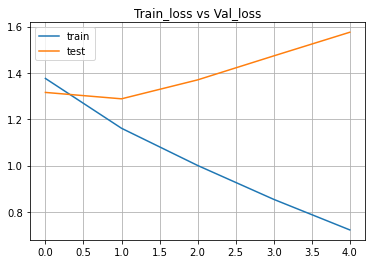

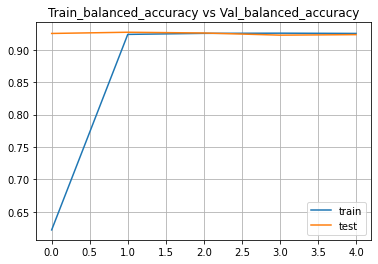

In [ ]:
plt.title('Loss')
plt.plot(result1.history['loss'], label='train')
plt.plot(result1.history['val_loss'], label='test')
plt.title('Train_loss vs Val_loss')
plt.grid()
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(result1.history['accuracy'], label='train')
plt.plot(result1.history['val_accuracy'], label='test')
plt.title('Train_balanced_accuracy vs Val_balanced_accuracy')
plt.grid()
plt.legend()
plt.show();

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = X_train_copy.copy()
X_test = X_test_copy.copy()
y_train = y_train_copy.copy()
y_test = y_test_copy.copy()

NameError: ignored

In [ ]:
X_train.shape,X_test.shape

((16839, 1), (5614, 1))

In [ ]:
y_train.shape,y_test.shape

((16839, 1), (5614, 1))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train.values.ravel())
X_test = vec.transform(X_test.values.ravel())

In [ ]:
X_train.shape,X_test.shape

((16839, 9826), (5614, 9826))

In [ ]:
import time
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score

In [ ]:
label = np.unique(y_train)
label

array(['Fear', 'anger', 'disgust', 'happy', 'sad', 'surprise'],
      dtype=object)

Results for Logistic regression:-

********************************************************************************

Training time(sec) =  3.0906336307525635
Prediction time(sec) =  0.0013496875762939453


********************************************************************************

Training score =  0.7286584232351152
Tesing score =  0.35533453459814496


********************************************************************************


No of missclassified for class Fear (test data) = 1399 
No of missclassified for class anger (test data) = 27 
No of missclassified for class disgust (test data) = 179 
No of missclassified for class happy (test data) = 478 
No of missclassified for class sad (test data) = 788 
No of missclassified for class surprise (test data) = 396 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  3267
Total % of missclassified points (test data) =  58.193801211257565


***************************

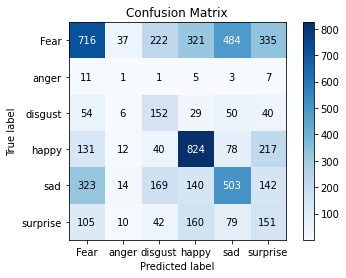



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

        Fear       0.53      0.34      0.41      2115
       anger       0.01      0.04      0.02        28
     disgust       0.24      0.46      0.32       331
       happy       0.56      0.63      0.59      1302
         sad       0.42      0.39      0.40      1291
    surprise       0.17      0.28      0.21       547

    accuracy                           0.42      5614
   macro avg       0.32      0.36      0.33      5614
weighted avg       0.46      0.42      0.43      5614



********************************************************************************


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, 
                        penalty='l2',           #or 'l1','elasticnet','none'
                        solver='lbfgs',         #or 'newton-cg'
                        multi_class='auto',     #or 'ovr','multinomial'
                        l1_ratio=None,          #or 0 <= l1_ratio <= 1 but only used if penalty='elasticnet'
                        class_weight='balanced', n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',lr_miss)
print('Total % of missclassified points (test data) = ',(lr_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

LR = [acc1_lr, acc2_lr, lr_miss, lr_miss/len(y_test), lr_time, lr_time2]

Results for Multinomial naive bayes classifier:-

********************************************************************************

Training time(sec) =  0.053240060806274414
Prediction time(sec) =  0.001268625259399414


********************************************************************************

Training score =  0.3996596651533193
Tesing score =  0.26659250491052616


********************************************************************************


No of missclassified for class Fear (test data) = 522 
No of missclassified for class anger (test data) = 28 
No of missclassified for class disgust (test data) = 311 
No of missclassified for class happy (test data) = 607 
No of missclassified for class sad (test data) = 982 
No of missclassified for class surprise (test data) = 540 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  2990
Total % of missclassified points (test data) =  53.259707873174214


************

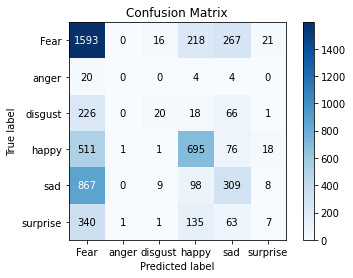



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

        Fear       0.45      0.75      0.56      2115
       anger       0.00      0.00      0.00        28
     disgust       0.43      0.06      0.11       331
       happy       0.60      0.53      0.56      1302
         sad       0.39      0.24      0.30      1291
    surprise       0.13      0.01      0.02       547

    accuracy                           0.47      5614
   macro avg       0.33      0.27      0.26      5614
weighted avg       0.43      0.47      0.42      5614



********************************************************************************


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0, fit_prior = False)

print('Results for Multinomial naive bayes classifier:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)

cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',mnb_miss)
print('Total % of missclassified points (test data) = ',(mnb_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

MNB = [acc1_mnb, acc2_mnb, mnb_miss, mnb_miss/len(y_test), mnb_time, mnb_time2]

In [ ]:
s1=[LSTM,LR,MNB]
s2=['LSTM','LR','MNB']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,LSTM,0.405171,0.301174,2901,51.674385,202.063004,6.681172
1,LR,0.728658,0.355335,3267,58.193801,3.090634,0.001350
2,MNB,0.399660,0.266593,2990,53.259708,0.053240,0.001269


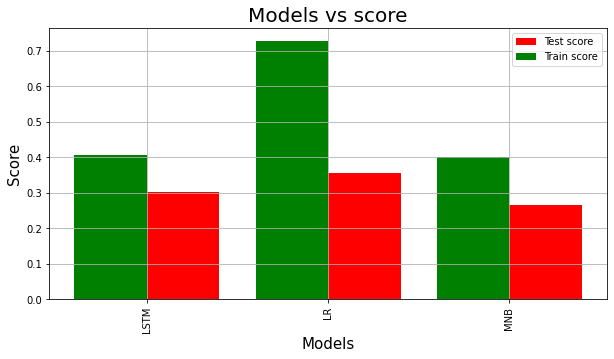

In [ ]:
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Test score'], color ='red',width = 0.4)
plt.bar(x-0.2, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Test score','Train score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

In [ ]:
!rm -rf /content/data

In [ ]:
import os
import joblib
os.mkdir('/content/data')
joblib.dump(encoder, "/content/data/encoder.joblib")
joblib.dump(word_tokenizer,'/content/data/tokenizer.joblib')

os.mkdir('data/model')
lstm_model.save('/content/data/model/')

In [ ]:
!zip -r model.zip /content/data/

  adding: content/data/ (stored 0%)
  adding: content/data/encoder.joblib (deflated 28%)
  adding: content/data/model/ (stored 0%)
  adding: content/data/model/variables/ (stored 0%)
  adding: content/data/model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/data/model/variables/variables.index (deflated 60%)
  adding: content/data/model/saved_model.pb (deflated 91%)
  adding: content/data/model/assets/ (stored 0%)
  adding: content/data/model/keras_metadata.pb (deflated 86%)
  adding: content/data/tokenizer.joblib (deflated 52%)


**Prediction Pipeline**

In [ ]:
import joblib 
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

model_path = '/content/data/model'
tokenizer_path = '/content/data/tokenizer.joblib'
encoder_path = '/content/data/encoder.joblib'

def balanced_accuracy(y_true, y_pred):
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()
    y_pred = np.argmax(y_pred,axis=-1)

    y_true = y_true.ravel().astype('int32')
    y_pred = y_pred.ravel().astype('int32')
    return balanced_accuracy_score(y_true,y_pred)

model = tf.keras.models.load_model(model_path,custom_objects = {'balanced_accuracy' : balanced_accuracy})
tokenizer = joblib.load(tokenizer_path)
encoder = joblib.load(encoder_path)

In [ ]:
import emoji
import contractions
import string
import spacy
import re
from textblob import TextBlob

def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

def spell_correct(tweet):
    sentence = TextBlob(tweet)
    return sentence.correct()

In [ ]:
nlp = spacy.load('en_core_web_sm')

def process(sent):
    d = nlp(sent)
    tokens=[]
    
    for i in d:
        if i.lemma_ != '-PRON-':
            tokens.append(i.lemma_)
    tokens = [tok for tok in tokens if tok not in string.punctuation]

    tokens = ' '.join(tokens)
    return tokens

def clean_text(sent):
    tweet = replace_retweet(sent, default_replace="")
    tweet = replace_user(tweet, default_replace="twitteruser")
    tweet = demojize(tweet)
    tweet = replace_url(tweet, default_replace="")
    tweet = replace_hashtag(tweet, default_replace="")
    tweet = to_lowercase(tweet)
    tweet = word_repetition(tweet)
    tweet = punct_repetition(tweet, default_replace="")
    tweet = fix_contractions(tweet)
    tweet = process(tweet)
    tweet = re.sub(' +',' ',tweet)
    tweet = str(spell_correct(tweet))
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    tweet = tweet.translate(translator)

    return str(tweet)

In [ ]:
max_len = 37
def prediction(text):
    original_text = text
    text = clean_text(text)
    text = tokenizer.texts_to_sequences([text])
    text = tf.keras.preprocessing.sequence.pad_sequences(text, maxlen = max_len, padding = 'pre',truncating='post', value=0.0)
    pred = model.predict(text)
    pred = np.argmax(pred,axis=1)
    pred = encoder.inverse_transform(pred)

    return original_text,pred[0]

In [ ]:
text = 'i want refund'
text,pred = prediction(text)
text,pred

1/1 [==============================] - 0s 24ms/step


('i want refund', 'Fear')